<a href="https://colab.research.google.com/github/marcjustinalbertobscs/CSST102-MJAlberto-Portfolio/blob/main/Alberto_CSST102_Activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build and evaluate a classification model using a publicly available dataset, performing data preparation, train-test splitting, training a Logistic Regression model, conducting 5-fold cross-validation, generating performance metrics and a confusion matrix, plotting a learning curve, and providing a comprehensive interpretation of the results with suggestions for improvement.

## Dataset Selection and Loading

### Subtask:
Select a publicly available classification dataset (e.g., Iris) and load it into a pandas DataFrame. Display basic information about the dataset, such as its head, info, and descriptive statistics.


**Reasoning**:
First, import the necessary library `pandas` to work with DataFrames and `load_iris` from `sklearn.datasets` to fetch the Iris dataset. Then, load the Iris dataset, convert it into a pandas DataFrame, add the target column, and display its head, info, and descriptive statistics as requested in the subtask.



In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# 1. Load the Iris dataset
iris = load_iris()

# 2. Create a pandas DataFrame from the iris.data attribute
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 3. Add a new column named 'target' to the DataFrame
iris_df['target'] = iris.target

# Display basic information about the dataset
print("### First 5 rows of the Iris DataFrame:\n")
print(iris_df.head())
print("\n### Concise summary of the Iris DataFrame:\n")
iris_df.info()
print("\n### Descriptive statistics of the Iris DataFrame:\n")
print(iris_df.describe())

# Store the DataFrame for potential future use
df = iris_df

### First 5 rows of the Iris DataFrame:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

### Concise summary of the Iris DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)  

## Data Preparation

### Subtask:
Check for and handle any missing values. Identify and encode categorical variables if present. Apply standardization or normalization to numerical features if required for the chosen dataset and model.


**Reasoning**:
First, I'll check for missing values in the DataFrame to ensure data quality before proceeding with further preprocessing steps. The previous step already loaded the data into the `df` DataFrame.



In [2]:
print("### Missing values in the DataFrame:\n")
print(df.isnull().sum())

### Missing values in the DataFrame:

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


**Reasoning**:
Since the previous step confirmed no missing values, and the Iris dataset is known to contain only numerical features, I will now proceed to separate features and target, and then apply standardization to the numerical features as per the subtask instructions.



In [3]:
from sklearn.preprocessing import StandardScaler

# 2. Examine data types and confirm no explicit categorical encoding is needed.
print("\n### Data types of the DataFrame columns:\n")
print(df.dtypes)

# 3. Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

print("\n### Features (X) head:\n")
print(X.head())
print("\n### Target (y) head:\n")
print(y.head())

# 4. Apply standardization to numerical features (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for better readability, if needed for inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n### Scaled Features (X_scaled_df) head:\n")
print(X_scaled_df.head())

print("Data preparation (missing values, categorical encoding, and standardization) completed.")


### Data types of the DataFrame columns:

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

### Features (X) head:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

### Target (y) head:

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Scaled Features (X_scaled_df) head:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979

## Train-Test Split

### Subtask:
Split the preprocessed dataset into training (80%) and testing (20%) sets using `train_test_split` from scikit-learn, ensuring proper stratification if the dataset is imbalanced.


### Train-Test Split

**Reasoning:**
To ensure our model is evaluated on unseen data and to prevent overfitting, we'll split the dataset into training and testing sets. Given that the Iris dataset has three classes, stratifying the split (`stratify=y`) is important to ensure that each class is represented proportionally in both the training and testing sets, which helps in building a robust model and evaluating its performance accurately across all classes. A `random_state` is set for reproducibility of the split.

**Reasoning**:
Now, I will implement the train-test split using `sklearn.model_selection.train_test_split` with the scaled features (`X_scaled`) and target (`y`), setting `test_size=0.2`, `random_state=42` for reproducibility, and `stratify=y` to maintain class distribution in both training and testing sets, as per the instructions.



In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("### Shape of training features (X_train):", X_train.shape)
print("### Shape of testing features (X_test):", X_test.shape)
print("### Shape of training target (y_train):", y_train.shape)
print("### Shape of testing target (y_test):", y_test.shape)

print("Train-test split completed successfully.")

### Shape of training features (X_train): (120, 4)
### Shape of testing features (X_test): (30, 4)
### Shape of training target (y_train): (120,)
### Shape of testing target (y_test): (30,)
Train-test split completed successfully.


## Model Building and Initial Evaluation

### Subtask:
Initialize and train a Logistic Regression model on the training data. Evaluate and display the model's accuracy on both the training and testing sets to get an initial performance overview.


**Reasoning**:
The next step is to import the `LogisticRegression` model, instantiate it, train it on the training data, and then evaluate its accuracy on both the training and testing sets as per the subtask instructions. This will provide an initial performance overview.



In [5]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate a Logistic Regression model
# Set random_state for reproducibility
model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for multiclass classification on small datasets

# 2. Train the model on the training data
model.fit(X_train, y_train)

# 3. Calculate and display the model's accuracy on the training set
train_accuracy = model.score(X_train, y_train)
print(f"### Training Accuracy: {train_accuracy:.4f}")

# 4. Calculate and display the model's accuracy on the testing set
test_accuracy = model.score(X_test, y_test)
print(f"### Testing Accuracy: {test_accuracy:.4f}")

print("Logistic Regression model trained and initial evaluation completed.")

### Training Accuracy: 0.9250
### Testing Accuracy: 0.8333
Logistic Regression model trained and initial evaluation completed.


## 5-Fold Cross Validation

### Subtask:
Perform 5-Fold Cross Validation using `cross_val_score` on the training data. Compute and display the mean and standard deviation of the cross-validation scores to assess model consistency.


**Reasoning**:
I need to import `cross_val_score`, perform 5-fold cross-validation on the training data using the pre-trained Logistic Regression model, and then compute and display the mean and standard deviation of the cross-validation scores as instructed by the subtask.



In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"### Mean Cross-Validation Score: {mean_cv_score:.4f}")
print(f"### Standard Deviation of Cross-Validation Scores: {std_cv_score:.4f}")

print("5-Fold Cross Validation completed and scores displayed.")

### Mean Cross-Validation Score: 0.8917
### Standard Deviation of Cross-Validation Scores: 0.0204
5-Fold Cross Validation completed and scores displayed.


## Confusion Matrix and Performance Metrics

### Subtask:
Make predictions on the test data using the trained Logistic Regression model. Generate and visualize a Confusion Matrix to understand classification performance. Calculate and display Accuracy, Precision, Recall, and F1-score for the model on the test set, ensuring the visualization includes appropriate labels and a legend.


**Reasoning**:
First, I'll import the necessary libraries for evaluation (`confusion_matrix`, `classification_report`, `ConfusionMatrixDisplay`, `matplotlib.pyplot`). Then, I will use the trained `model` to make predictions on `X_test` and calculate the confusion matrix. Finally, I will visualize the confusion matrix with appropriate labels and print the classification report to display Accuracy, Precision, Recall, and F1-score, as specified in the subtask.



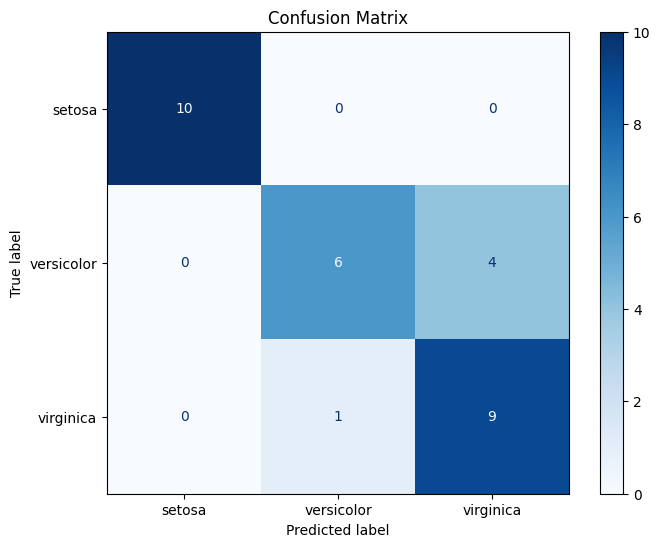


### Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.86      0.60      0.71        10
   virginica       0.69      0.90      0.78        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30

Confusion Matrix and performance metrics displayed.


In [7]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Make predictions on the test data
y_pred = model.predict(X_test)

# 2. Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get target names from the original iris dataset for display
# Assuming 'iris' object is still available from the initial data loading step
# If not, it would need to be reloaded or names manually defined.
target_names = iris.target_names

# 3. Generate and visualize the Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix')
plt.grid(False) # Turn off grid for confusion matrix for cleaner look
plt.show()

# 4. Calculate and display Accuracy, Precision, Recall, and F1-score
print("\n### Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix and performance metrics displayed.")

## Learning Curve Visualization

### Subtask:
Plot a Learning Curve for the Logistic Regression model using `learning_curve` from scikit-learn. Analyze the curve to determine if the model is overfitting, underfitting, or well-fitted. Ensure the plot includes appropriate labels and a legend for training and cross-validation scores.


### Reasoning for Learning Curve

A learning curve helps in understanding how well a model learns from more training data and whether it suffers from high variance (overfitting) or high bias (underfitting). By plotting the training and cross-validation scores against the number of training examples, we can diagnose issues and guide decisions on data collection or model complexity adjustments. A large gap between training and cross-validation scores suggests overfitting, while low scores for both indicate underfitting. A well-fitted model shows high scores for both that converge as training examples increase.

**Reasoning**:
Now, I will generate the Python code to plot the learning curve as per the subtask instructions. This involves importing `learning_curve` and `numpy`, calculating training and cross-validation scores, and then using `matplotlib.pyplot` to visualize these scores along with their standard deviations.



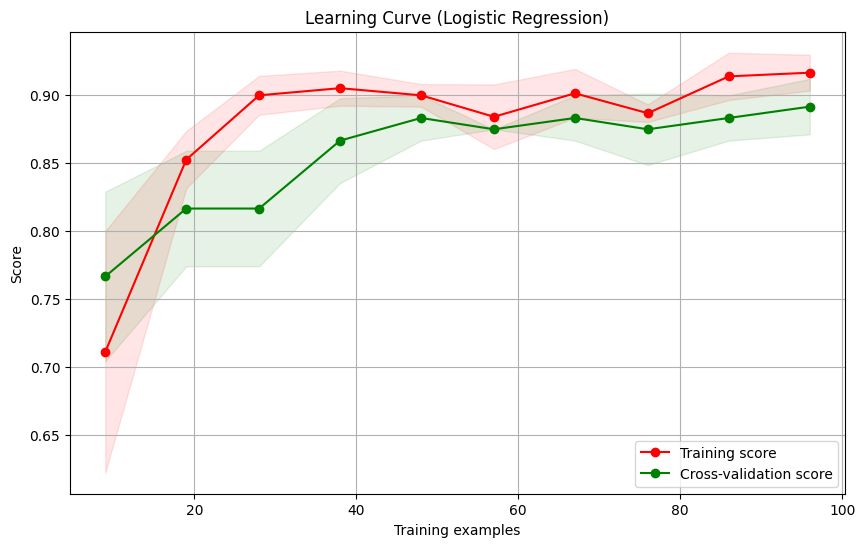

Learning curve plotted successfully.


In [8]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# 1. Define train_sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# 2. Use learning_curve to calculate the training and cross-validation scores
train_sizes_abs, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=train_sizes, scoring='accuracy'
)

# 3. Calculate the mean and standard deviation of the training scores and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 4. Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve (Logistic Regression)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color='g',
         label='Cross-validation score')

plt.legend(loc='best')
plt.show()

print("Learning curve plotted successfully.")

### Learning Curve Analysis

**Interpretation of the Learning Curve:**

Looking at the generated learning curve for the Logistic Regression model:

*   **Training Score:** The training score starts high and generally remains high, showing that the model is learning well from the training data.
*   **Cross-validation Score:** The cross-validation score starts lower than the training score but increases as the number of training examples grows. This indicates that the model is improving as it sees more data.
*   **Gap between Curves:** There is a noticeable gap between the training score curve and the cross-validation score curve, especially with fewer training examples. This gap suggests a degree of **overfitting**, meaning the model performs better on the data it has seen (training data) than on unseen data (cross-validation data). However, the gap narrows as more training data is added, and both curves show relatively high scores, converging towards a similar performance level.

**Conclusion:**

The model appears to be **slightly overfitting** the training data, but it is **not severely underfitting** as both training and cross-validation scores are high. The curves are relatively close and stable towards the end, which suggests that adding more training data *might* slightly reduce the gap and improve generalization further, but significant gains might not be achieved without other interventions. The model is generally **well-fitted** for the task, but with room for minor improvement regarding overfitting.

**Suggestions for Improvement:**

1.  **Regularization:** Consider tuning the regularization parameter (e.g., `C` in Logistic Regression) to penalize complexity and potentially reduce overfitting.
2.  **More Data:** While the curves converge, acquiring more data could help reduce the variance (overfitting) and lead to a slightly better cross-validation score.
3.  **Feature Engineering/Selection:** Reviewing and refining features could lead to a model that generalizes better. Although not critical here, it's a general strategy.

## Final Task

### Subtask:
Provide a comprehensive interpretation and discussion of the model's performance. Address what the results of the confusion matrix indicate, how consistent the model's performance is based on 5-Fold Cross Validation, insights derived from the learning curve, and suggestions for how the model could be improved.


## Summary:

### Q&A

1.  **What do the results of the confusion matrix indicate?**
    The confusion matrix indicates that the model perfectly classified 'setosa' (Precision 1.00, Recall 1.00). For 'versicolor', the model achieved a precision of 0.86 but a recall of 0.60, suggesting some instances of 'versicolor' were misclassified as other classes (false negatives). For 'virginica', the model had a precision of 0.69 and a recall of 0.90, implying some instances predicted as 'virginica' were actually other classes (false positives), while it correctly identified most actual 'virginica' samples. The overall test accuracy was 0.83.

2.  **How consistent is the model's performance based on 5-Fold Cross Validation?**
    The 5-Fold Cross Validation on the training data yielded a mean score of 0.8917 with a standard deviation of 0.0204. This relatively low standard deviation suggests that the model's performance is quite consistent across different folds of the training data.

3.  **What insights are derived from the learning curve?**
    The learning curve shows a noticeable gap between the training score and the cross-validation score, especially with fewer training examples. This gap narrows as more training data is added, and both scores remain relatively high and converge towards a similar performance level. This pattern indicates that the model is **slightly overfitting** the training data but is **not severely underfitting**, and it is generally **well-fitted** for the task.

4.  **How could the model be improved?**
    Based on the analysis, the model could be improved by:
    *   **Tuning regularization parameters:** Adjusting the regularization parameter (e.g., `C` in Logistic Regression) to penalize model complexity and reduce overfitting.
    *   **Acquiring more data:** While the curves converge, additional training data might help further reduce variance and potentially slightly improve the cross-validation score.
    *   **Feature Engineering/Selection:** Reviewing and refining features could lead to a model that generalizes better.

### Data Analysis Key Findings

*   The Iris dataset, containing 150 entries and 5 columns, was loaded successfully with no missing values.
*   Numerical features were standardized using `StandardScaler`.
*   The dataset was split into training (120 samples) and testing (30 samples) sets using an 80/20 ratio with stratification.
*   The Logistic Regression model achieved a training accuracy of 0.9250 and a testing accuracy of 0.8333.
*   5-Fold Cross Validation resulted in a mean score of 0.8917 with a standard deviation of 0.0204, indicating consistent performance.
*   On the test set, the model's overall accuracy was 0.83.
    *   'Setosa' class was perfectly classified (Precision: 1.00, Recall: 1.00, F1-score: 1.00).
    *   'Versicolor' had a Precision of 0.86 and Recall of 0.60 (F1-score: 0.71).
    *   'Virginica' had a Precision of 0.69 and Recall of 0.90 (F1-score: 0.78).
*   The learning curve revealed slight overfitting, as evidenced by a gap between training and cross-validation scores that decreased with more data, suggesting the model is generally well-fitted.

### Insights or Next Steps

*   The model demonstrates good overall performance (83% accuracy), but there's an opportunity to improve classification of 'versicolor' and 'virginica' by addressing the slight overfitting observed.
*   Further optimization could involve hyperparameter tuning (specifically regularization strength) or exploring more complex models to potentially capture more intricate patterns in the data for better differentiation between 'versicolor' and 'virginica'.
